In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from pprint import pprint

In [2]:
df = pd.read_json(os.getcwd() + '/Data/aptsimulator_cobaltstrike_2021-06-11T21081492.json', lines = True)
df.shape

(2611, 126)

In [3]:
df.head()

,SourceName,ProviderGuid,Level,Keywords,Channel,Hostname,TimeCreated,@timestamp,EventID,Message,...,ServiceType,ServiceStartType,ServiceAccount,ClientProcessStartKey,ClientProcessId,ImagePath,StartType,AccountName,param1,param2
0,Microsoft-Windows-Sysmon,{5770385f-c22a-43e0-bf4c-06f5698ffbd9},4,0x8000000000000000,Microsoft-Windows-Sysmon/Operational,WORKSTATION5,2021-06-11T09:07:15.635Z,2021-06-11T09:07:15.635Z,1,Process Create:\r\nRuleName: -\r\nUtcTime: 202...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Microsoft-Windows-Sysmon,{5770385f-c22a-43e0-bf4c-06f5698ffbd9},4,0x8000000000000000,Microsoft-Windows-Sysmon/Operational,WORKSTATION5,2021-06-11T09:07:15.636Z,2021-06-11T09:07:15.636Z,10,Process accessed:\r\nRuleName: -\r\nUtcTime: 2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Microsoft-Windows-Sysmon,{5770385f-c22a-43e0-bf4c-06f5698ffbd9},4,0x8000000000000000,Microsoft-Windows-Sysmon/Operational,WORKSTATION5,2021-06-11T09:07:15.636Z,2021-06-11T09:07:15.636Z,10,Process accessed:\r\nRuleName: -\r\nUtcTime: 2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Microsoft-Windows-Sysmon,{5770385f-c22a-43e0-bf4c-06f5698ffbd9},4,0x8000000000000000,Microsoft-Windows-Sysmon/Operational,WORKSTATION5,2021-06-11T09:07:15.636Z,2021-06-11T09:07:15.636Z,7,Image loaded:\r\nRuleName: -\r\nUtcTime: 2021-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Microsoft-Windows-Sysmon,{5770385f-c22a-43e0-bf4c-06f5698ffbd9},4,0x8000000000000000,Microsoft-Windows-Sysmon/Operational,WORKSTATION5,2021-06-11T09:07:15.636Z,2021-06-11T09:07:15.636Z,7,Image loaded:\r\nRuleName: -\r\nUtcTime: 2021-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
x = [i for i in range(0, 126, 25)]

for i in range(len(x) - 1):
    pprint(df.iloc[:, x[i] : x[i + 1]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entries, 0 to 2610
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SourceName        2611 non-null   object
 1   ProviderGuid      2611 non-null   object
 2   Level             2611 non-null   int64 
 3   Keywords          2611 non-null   object
 4   Channel           2611 non-null   object
 5   Hostname          2611 non-null   object
 6   TimeCreated       2611 non-null   object
 7   @timestamp        2611 non-null   object
 8   EventID           2611 non-null   int64 
 9   Message           2611 non-null   object
 10  Task              2611 non-null   int64 
 11  RuleName          2264 non-null   object
 12  UtcTime           2264 non-null   object
 13  ProcessGuid       1170 non-null   object
 14  ProcessId         1431 non-null   object
 15  Image             1170 non-null   object
 16  FileVersion       948 non-null    object
 17  Description   

In [5]:
# df.to_csv(os.getcwd() + '/Data/data_csv.csv')
# print('Done')

In [6]:
df['SourceName'].value_counts()

Microsoft-Windows-Sysmon               2264
Microsoft-Windows-Security-Auditing     344
Service Control Manager                   3
Name: SourceName, dtype: int64

In [7]:
df['ProviderGuid'] = df['ProviderGuid'].apply(lambda x: x[1 : -1])
df['ProviderGuid'].value_counts()

5770385f-c22a-43e0-bf4c-06f5698ffbd9    2264
54849625-5478-4994-a5ba-3e3b0328c30d     344
555908d1-a6d7-4695-8e1e-26931d2012f4       3
Name: ProviderGuid, dtype: int64

In [8]:
df['Level'].value_counts()

4    2265
0     344
2       2
Name: Level, dtype: int64

In [9]:
df['Channel'].value_counts()

Microsoft-Windows-Sysmon/Operational    2264
Security                                 344
System                                     3
Name: Channel, dtype: int64

In [10]:
df['Hostname'].value_counts()

WORKSTATION5    2611
Name: Hostname, dtype: int64

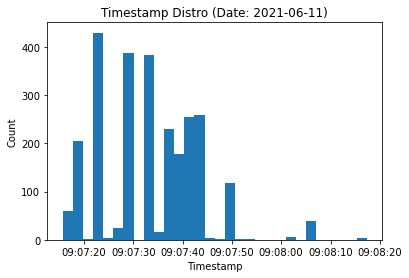

In [11]:
df['@timestamp'] = pd.to_datetime(df['@timestamp'])

plt.hist(df['@timestamp'], bins = 30, log = False)
plt.title('Timestamp Distro (Date: 2021-06-11)')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.show()
plt.close()

In [12]:
df['EventID'].value_counts()

10      1094
7        911
13        90
4658      82
12        56
4656      41
4690      41
1         37
4689      36
5         36
4688      36
4663      34
5156      26
4703      22
26        18
5145      14
11        13
5158       9
17         5
3          2
5140       1
7045       1
7009       1
7000       1
4670       1
9          1
18         1
4697       1
Name: EventID, dtype: int64

Windows event IDs: https://www.eventid.net/

In [13]:
df['RuleName'].value_counts()

-                1869
MsMpEng           388
RuntimeBroker       7
Name: RuleName, dtype: int64

In [14]:
df['ProcessGuid'] = df['ProcessGuid'].apply(lambda x: x if pd.isna(x) else x[1 : -1])
df['ProcessGuid'].value_counts()

e2c04bb9-a70e-60c3-0d61-390000000000    66
e2c04bb9-08e5-60c4-9a09-000000000300    60
e2c04bb9-08cb-60c4-7e09-000000000300    45
e2c04bb9-08d5-60c4-8609-000000000300    45
e2c04bb9-08d0-60c4-8209-000000000300    45
                                        ..
e2c04bb9-08e5-60c4-1fd7-400100000000     1
e2c04bb9-08c6-60c4-2c20-400100000000     1
e2c04bb9-08da-60c4-bc9c-400100000000     1
e2c04bb9-08dd-60c4-d3c2-400100000000     1
e2c04bb9-08c3-60c4-1c17-400100000000     1
Name: ProcessGuid, Length: 82, dtype: int64

In [15]:
df['ProcessId'].value_counts()

1320      66
6280      61
4432      46
2460      46
5924      46
          ..
1168       1
0x17e4     1
0x2300     1
0x5a0      1
0x404      1
Name: ProcessId, Length: 93, dtype: int64

In [16]:
df['Image'] = df['Image'].apply(lambda x: x if pd.isna(x) else x.lower().strip())
df['Image'].value_counts()

c:\windows\system32\conhost.exe                                                                                                   281
c:\windows\system32\taskkill.exe                                                                                                  229
c:\windows\system32\timeout.exe                                                                                                   139
c:\tmp\createnamedpipe.exe                                                                                                        111
c:\windows\explorer.exe                                                                                                            66
c:\windows\system32\ping.exe                                                                                                       64
c:\windows\system32\cscript.exe                                                                                                    61
c:\windows\system32\svchost.exe                               

In [17]:
df['FileVersion'].value_counts()

10.0.18362.1 (WinBuild.160101.0800)           156
10.0.18362.1500 (WinBuild.160101.0800)        126
10.0.18362.1316 (WinBuild.160101.0800)         94
10.0.18362.1533 (WinBuild.160101.0800)         75
10.0.18362.1474 (WinBuild.160101.0800)         74
10.0.18362.387 (WinBuild.160101.0800)          58
10.0.18362.1110 (WinBuild.160101.0800)         51
10.0.18362.1411 (WinBuild.160101.0800)         41
10.0.18362.1237 (WinBuild.160101.0800)         38
7.0.18362.1 (WinBuild.160101.0800)             37
10.0.18362.1556 (WinBuild.160101.0800)         36
-                                              28
10.0.18362.752 (WinBuild.160101.0800)          21
10.0.18362.1171 (WinBuild.160101.0800)         17
2001.12.10941.16384 (WinBuild.160101.0800)     13
10.0.18362.1350 (WinBuild.160101.0800)          8
10.0.18362.1139 (WinBuild.160101.0800)          7
5.812.10240.16384                               7
4.18.2105.4 (WinBuild.160101.0800)              6
10.0.18362.815 (WinBuild.160101.0800)           5


In [18]:
df['Description'].value_counts()

Windows NT BASE API Client DLL                      74
Microsoft® C Runtime Library                        53
GDI Client DLL                                      44
NT Layer DLL                                        38
Windows NT CRT DLL                                  37
                                                    ..
Wow64 Console and Win32 API Logging                  1
Unicode Normalization DLL                            1
7z Plugin                                            1
Windows ® Script Component Runtime                   1
Windows Cryptographic Primitives Library (Wow64)     1
Name: Description, Length: 93, dtype: int64

In [19]:
df['Product'].value_counts()

Microsoft® Windows® Operating System               901
-                                                   28
Internet Explorer                                    5
Microsoft ® Windows Script Host                      3
7-Zip                                                3
Microsoft® Visual Studio® 2013                       2
Microsoft ® Script Runtime                           1
Microsoft ® Windows ® Script Component Runtime       1
Microsoft ® Windows Script Host Runtime Library      1
Windows Installer - Unicode                          1
Microsoft XML Core Services                          1
Microsoft ® VBScript                                 1
Name: Product, dtype: int64

In [20]:
df['Company'].value_counts()

Microsoft Corporation    917
-                         28
Igor Pavlov                3
Name: Company, dtype: int64

In [21]:
df['OriginalFileName'].value_counts()

gdi32             44
ntdll.dll         38
Kernelbase.dll    37
rpcrt4.dll        37
msvcrt.dll        37
                  ..
SXS.DLL            1
esent.dll          1
wow64lg2.dll       1
msvcp120.dll       1
msvcr120.dll       1
Name: OriginalFileName, Length: 104, dtype: int64

In [22]:
df['SourceProcessGUID'] = df['SourceProcessGUID'].apply(lambda x: x if pd.isna(x) else x[1 : -1])
df['SourceProcessGUID'].value_counts()

e2c04bb9-a3f6-60c3-8600-000000000300    603
e2c04bb9-a70e-60c3-0d61-390000000000    326
e2c04bb9-a703-60c3-b501-000000000300     32
e2c04bb9-a346-60c3-0f00-000000000300     28
e2c04bb9-d0f0-60c3-48da-ec0000000000     27
e2c04bb9-d0f0-60c3-0ae0-ec0000000000     22
e2c04bb9-a70c-60c3-6abd-380000000000     10
e2c04bb9-a3ee-60c3-5200-000000000300     10
e2c04bb9-a3ee-60c3-5100-000000000300      8
e2c04bb9-a347-60c3-1200-000000000300      6
e2c04bb9-a33f-60c3-0700-000000000300      5
e2c04bb9-a342-60c3-0c00-000000000300      2
e2c04bb9-a347-60c3-1300-000000000300      2
e2c04bb9-08d0-60c4-8509-000000000300      1
e2c04bb9-08cb-60c4-7e09-000000000300      1
e2c04bb9-08dd-60c4-9109-000000000300      1
e2c04bb9-08d5-60c4-8909-000000000300      1
e2c04bb9-08c6-60c4-7d09-000000000300      1
e2c04bb9-08d5-60c4-8609-000000000300      1
e2c04bb9-08e5-60c4-9b09-000000000300      1
e2c04bb9-08cb-60c4-8009-000000000300      1
e2c04bb9-08d0-60c4-8209-000000000300      1
e2c04bb9-08dd-60c4-9309-00000000

In [23]:
# df['SourceProcessId'].value_counts()

In [24]:
# df['SourceThreadId'].value_counts()

In [25]:
df['SourceImage'].value_counts()

C:\Windows\system32\wbem\wmiprvse.exe    603
C:\Windows\Explorer.EXE                  326
C:\Windows\system32\svchost.exe           44
C:\Windows\system32\csrss.exe             37
C:\Windows\system32\conhost.exe           29
C:\Windows\system32\cmd.exe               28
C:\Windows\System32\svchost.exe           10
C:\Windows\system32\ctfmon.exe            10
C:\Windows\system32\taskkill.exe           4
C:\Windows\system32\services.exe           2
C:\Windows\system32\lsass.exe              1
Name: SourceImage, dtype: int64

In [26]:
df['TargetProcessGUID'] = df['TargetProcessGUID'].apply(lambda x: x if pd.isna(x) else x[1 : -1])
df['TargetProcessGUID'].value_counts()

e2c04bb9-08d5-60c4-8709-000000000300    49
e2c04bb9-08cb-60c4-eb40-400100000000    49
e2c04bb9-08d0-60c4-8309-000000000300    47
e2c04bb9-08c6-60c4-681f-400100000000    47
e2c04bb9-08db-60c4-8c09-000000000300    44
                                        ..
e2c04bb9-08d5-60c4-8809-000000000300     3
e2c04bb9-08da-60c4-8b09-000000000300     3
e2c04bb9-08dd-60c4-9109-000000000300     2
e2c04bb9-08e5-60c4-9b09-000000000300     1
e2c04bb9-08dd-60c4-9309-000000000300     1
Name: TargetProcessGUID, Length: 155, dtype: int64

In [27]:
# df['TargetProcessId'].value_counts()

In [28]:
# df['TargetImage'].value_counts()

In [29]:
df['GrantedAccess'].value_counts()

0x1410      638
0x1000      266
0x1fffff     95
0x2000       68
0x1400       10
0x100000      6
0x1478        5
0x1401        4
0x3000        2
Name: GrantedAccess, dtype: int64

In [30]:
df['ImageLoaded'].value_counts()

C:\Windows\System32\ntdll.dll         37
C:\Windows\System32\kernel32.dll      36
C:\Windows\System32\msvcrt.dll        36
C:\Windows\System32\rpcrt4.dll        36
C:\Windows\System32\KernelBase.dll    36
                                      ..
C:\Windows\System32\coml2.dll          1
C:\Windows\System32\cmd.exe            1
C:\Windows\SysWOW64\bcrypt.dll         1
C:\Windows\SysWOW64\ucrtbase.dll       1
C:\Windows\SysWOW64\gdi32full.dll      1
Name: ImageLoaded, Length: 129, dtype: int64

In [31]:
df['Signed'].value_counts()

true     902
false      9
Name: Signed, dtype: int64

In [32]:
df['Signature'].value_counts()

Microsoft Windows        900
-                          9
Microsoft Corporation      2
Name: Signature, dtype: int64

In [33]:
df['SignatureStatus'].value_counts()

Valid          902
Unavailable      9
Name: SignatureStatus, dtype: int64

Most common event IDs by timestamp distro:

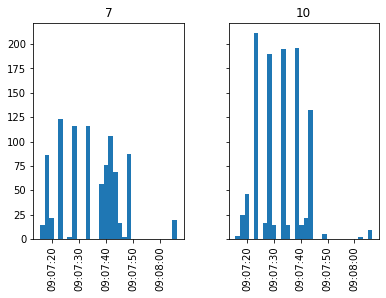

In [34]:
filtered_eventID_df = df[df['EventID'].isin([10, 7])]

filtered_eventID_df['@timestamp'].hist(by = filtered_eventID_df['EventID'], bins = 30, sharey = True)
plt.show()
plt.close()

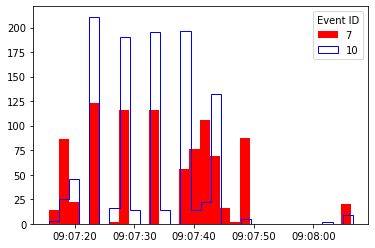

In [35]:
plt.hist(filtered_eventID_df[filtered_eventID_df['EventID'] == 7]['@timestamp'], bins = 30, histtype = 'bar', color = '#ff0000', label = '7')
plt.hist(filtered_eventID_df[filtered_eventID_df['EventID'] == 10]['@timestamp'], bins = 30, histtype = 'step', color = '#0000ff', label = '10')
plt.legend(title = 'Event ID')
plt.show()
plt.close()

Channel + event ID counts: 

In [36]:
df.groupby(['Channel', 'EventID']).size().reset_index().sort_values(0, ascending = False)

,Channel,EventID,0
5,Microsoft-Windows-Sysmon/Operational,10,1094
3,Microsoft-Windows-Sysmon/Operational,7,911
8,Microsoft-Windows-Sysmon/Operational,13,90
13,Security,4658,82
7,Microsoft-Windows-Sysmon/Operational,12,56
12,Security,4656,41
18,Security,4690,41
0,Microsoft-Windows-Sysmon/Operational,1,37
2,Microsoft-Windows-Sysmon/Operational,5,36
17,Security,4689,36


Level + event ID counts:

In [37]:
df.groupby(['Level', 'EventID']).size().reset_index().sort_values(['Level', 0], ascending = False)

,Level,EventID,0
20,4,10,1094
18,4,7,911
23,4,13,90
22,4,12,56
15,4,1,37
17,4,5,36
26,4,26,18
21,4,11,13
24,4,17,5
16,4,3,2


Idea: Use source process GUID to track a sequence? 

eg. e2c04bb9-a3f6-60c3-8600-000000000300 has 603 occurrences, so track that over time

In [38]:
spGUID = df['SourceProcessGUID'].value_counts().index[0]

filtered_spGUID_df = df[df['SourceProcessGUID'] == spGUID]
filtered_spGUID_df.shape

(603, 126)

In [39]:
for i in range(len(x) - 1):
    pprint(filtered_spGUID_df.iloc[:, x[i] : x[i + 1]].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 603 entries, 299 to 2063
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   SourceName        603 non-null    object             
 1   ProviderGuid      603 non-null    object             
 2   Level             603 non-null    int64              
 3   Keywords          603 non-null    object             
 4   Channel           603 non-null    object             
 5   Hostname          603 non-null    object             
 6   TimeCreated       603 non-null    object             
 7   @timestamp        603 non-null    datetime64[ns, UTC]
 8   EventID           603 non-null    int64              
 9   Message           603 non-null    object             
 10  Task              603 non-null    int64              
 11  RuleName          603 non-null    object             
 12  UtcTime           603 non-null    object             
 13  Pr

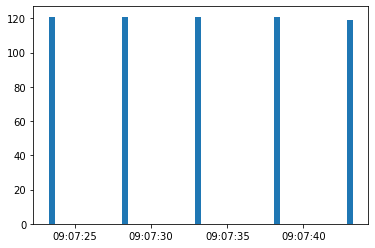

In [40]:
plt.hist(filtered_spGUID_df['@timestamp'], bins = 50)
plt.show()
plt.close()

In [41]:
filtered_spGUID_df['EventID'].value_counts()

10    603
Name: EventID, dtype: int64

In [42]:
filtered_spGUID_df['Level'].value_counts()

4    603
Name: Level, dtype: int64

In [43]:
filtered_spGUID_df['Channel'].value_counts()

Microsoft-Windows-Sysmon/Operational    603
Name: Channel, dtype: int64

Windows Defender

In [44]:
win_def = df[df['RuleName'] == 'MsMpEng']
win_def.shape

(388, 126)

In [45]:
# for i in range(len(x) - 1):
#     pprint(win_def.iloc[:, x[i] : x[i + 1]].info())

In [46]:
win_def = win_def.dropna(axis = 1)
win_def.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 289 to 2060
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   SourceName         388 non-null    object             
 1   ProviderGuid       388 non-null    object             
 2   Level              388 non-null    int64              
 3   Keywords           388 non-null    object             
 4   Channel            388 non-null    object             
 5   Hostname           388 non-null    object             
 6   TimeCreated        388 non-null    object             
 7   @timestamp         388 non-null    datetime64[ns, UTC]
 8   EventID            388 non-null    int64              
 9   Message            388 non-null    object             
 10  Task               388 non-null    int64              
 11  RuleName           388 non-null    object             
 12  UtcTime            388 non-null    object      

In [47]:
win_def['SourceName'].value_counts()

Microsoft-Windows-Sysmon    388
Name: SourceName, dtype: int64

In [48]:
win_def['ProviderGuid'].value_counts()

5770385f-c22a-43e0-bf4c-06f5698ffbd9    388
Name: ProviderGuid, dtype: int64

In [49]:
win_def['Level'].value_counts()

4    388
Name: Level, dtype: int64

In [50]:
win_def['Keywords'].value_counts()

0x8000000000000000    388
Name: Keywords, dtype: int64

In [51]:
win_def['Channel'].value_counts()

Microsoft-Windows-Sysmon/Operational    388
Name: Channel, dtype: int64

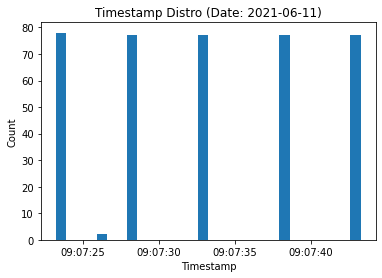

In [52]:
plt.hist(win_def['@timestamp'], bins = 30, log = False)
plt.title('Timestamp Distro (Date: 2021-06-11)')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.show()
plt.close()

In [53]:
win_def['EventID'].value_counts()

10    388
Name: EventID, dtype: int64

https://www.eventid.net/display.asp?eventid=10&source=

In [54]:
win_def['SourceProcessGUID'].value_counts()

e2c04bb9-a3f6-60c3-8600-000000000300    385
e2c04bb9-a346-60c3-0f00-000000000300      2
e2c04bb9-a342-60c3-0d00-000000000300      1
Name: SourceProcessGUID, dtype: int64

In [55]:
# win_def['SourceProcessId'].value_counts()

In [56]:
# win_def['SourceThreadId'].value_counts()

In [57]:
win_def['TargetProcessGUID'].value_counts()

e2c04bb9-a525-60c3-5601-000000000300    7
e2c04bb9-a3ef-60c3-5f00-000000000300    6
e2c04bb9-417d-60c3-4000-000000000300    5
e2c04bb9-a4e2-60c3-1001-000000000300    5
e2c04bb9-a347-60c3-1300-000000000300    5
                                       ..
e2c04bb9-a70b-60c3-3551-380000000000    5
e2c04bb9-a35d-60c3-1c00-000000000300    5
e2c04bb9-a3ef-60c3-5a00-000000000300    5
e2c04bb9-a718-60c3-6f53-3e0000000000    5
e2c04bb9-a41c-60c3-b900-000000000300    5
Name: TargetProcessGUID, Length: 77, dtype: int64

In [58]:
# win_def['TargetProcessId'].value_counts()

In [59]:
win_def['TargetImage'].apply(lambda x: x.lower()).value_counts()

c:\windows\system32\svchost.exe    388
Name: TargetImage, dtype: int64

In [60]:
win_def['GrantedAccess'].value_counts()

0x1410    385
0x1000      3
Name: GrantedAccess, dtype: int64

Weird Images

In [61]:
img_df = df.iloc[df['Image'].dropna().index, ]
img_df.shape

(1170, 126)

In [62]:
img_df = img_df[img_df['Image'].apply(lambda x: 'tmp' in x or 'b6a1458f396' in x)]
img_df.shape

(131, 126)

In [63]:
img_df['Image'].value_counts()

c:\tmp\createnamedpipe.exe    111
c:\windows\b6a1458f396.exe     20
Name: Image, dtype: int64

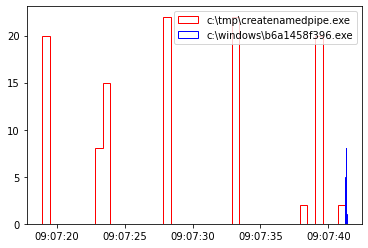

In [64]:
plt.hist(img_df[img_df['Image'] == 'c:\\tmp\\createnamedpipe.exe']['@timestamp'], bins = 40, histtype = 'step', color = '#ff0000', label = 'c:\\tmp\\createnamedpipe.exe')
plt.hist(img_df[img_df['Image'] == 'c:\\windows\\b6a1458f396.exe']['@timestamp'], bins = 5, histtype = 'step', color = '#0000ff', label = 'c:\\windows\\b6a1458f396.exe')
plt.legend()
plt.show()
plt.close()

In [65]:
img_df[img_df['Image'] == 'c:\\tmp\\createnamedpipe.exe']['@timestamp'].max()

Timestamp('2021-06-11 09:07:41.245000+0000', tz='UTC')

In [66]:
img_df[img_df['Image'] == 'c:\\windows\\b6a1458f396.exe']['@timestamp'].min()

Timestamp('2021-06-11 09:07:41.254000+0000', tz='UTC')

In [67]:
img_df.groupby(['Image', 'Level']).size()

Image                       Level
c:\tmp\createnamedpipe.exe  4        111
c:\windows\b6a1458f396.exe  4         20
dtype: int64

In [68]:
img_df.groupby(['Image', 'EventID']).size()

Image                       EventID
c:\tmp\createnamedpipe.exe  1           5
                            5           5
                            7          86
                            13         10
                            17          5
c:\windows\b6a1458f396.exe  1           1
                            5           1
                            7          18
dtype: int64

Timestamp distro for event ID 7:

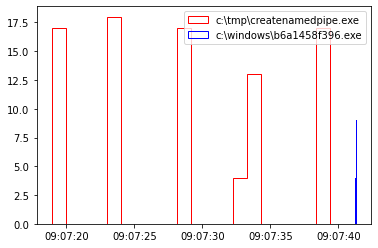

In [69]:
plt.hist(img_df[(img_df['Image'] == r'c:\tmp\createnamedpipe.exe') & (img_df['EventID'] == 7)]['@timestamp'], bins = 20, histtype = 'step', color = '#ff0000', label = r'c:\tmp\createnamedpipe.exe')
plt.hist(img_df[(img_df['Image'] == r'c:\windows\b6a1458f396.exe') & (img_df['EventID'] == 7)]['@timestamp'], bins = 5, histtype = 'step', color = '#0000ff', label = r'c:\windows\b6a1458f396.exe')
# plt.hist(img_df[(img_df['Image'] == r'c:\tmp\createnamedpipe.exe') & (img_df['EventID'] == 7)]['@timestamp'], bins = 20, histtype = 'step', color = '#ff0000')
# plt.hist(img_df[(img_df['Image'] == r'c:\tmp\createnamedpipe.exe') & (img_df['EventID'] == 7)]['@timestamp'], bins = 20, histtype = 'step', color = '#ff0000')
plt.legend()
plt.show()
plt.close()

In [70]:
img_df.groupby(['Image', 'SourceName']).size()

Image                       SourceName              
c:\tmp\createnamedpipe.exe  Microsoft-Windows-Sysmon    111
c:\windows\b6a1458f396.exe  Microsoft-Windows-Sysmon     20
dtype: int64

In [71]:
img_df.groupby(['Image', 'Channel']).size()

Image                       Channel                             
c:\tmp\createnamedpipe.exe  Microsoft-Windows-Sysmon/Operational    111
c:\windows\b6a1458f396.exe  Microsoft-Windows-Sysmon/Operational     20
dtype: int64

In [72]:
img_df.groupby(['Image', 'RuleName']).size()

Image                       RuleName
c:\tmp\createnamedpipe.exe  -           111
c:\windows\b6a1458f396.exe  -            20
dtype: int64

In [73]:
img_df.groupby(['ProcessGuid', 'Image']).size()

ProcessGuid                           Image                     
e2c04bb9-08c6-60c4-681f-400100000000  c:\tmp\createnamedpipe.exe    22
e2c04bb9-08cb-60c4-eb40-400100000000  c:\tmp\createnamedpipe.exe    23
e2c04bb9-08d0-60c4-5d60-400100000000  c:\tmp\createnamedpipe.exe     1
e2c04bb9-08d0-60c4-8309-000000000300  c:\tmp\createnamedpipe.exe    21
e2c04bb9-08d5-60c4-6c7e-400100000000  c:\tmp\createnamedpipe.exe     1
e2c04bb9-08d5-60c4-8709-000000000300  c:\tmp\createnamedpipe.exe    21
e2c04bb9-08db-60c4-539f-400100000000  c:\tmp\createnamedpipe.exe     1
e2c04bb9-08db-60c4-8c09-000000000300  c:\tmp\createnamedpipe.exe    21
e2c04bb9-08dd-60c4-9209-000000000300  c:\windows\b6a1458f396.exe    19
e2c04bb9-08dd-60c4-deb8-400100000000  c:\windows\b6a1458f396.exe     1
dtype: int64

In [74]:
img_df.groupby(['Image', 'SignatureStatus']).size()

Image                       SignatureStatus
c:\tmp\createnamedpipe.exe  Unavailable         5
                            Valid              81
c:\windows\b6a1458f396.exe  Unavailable         1
                            Valid              17
dtype: int64

Other attributes:

In [75]:
df['CommandLine'].value_counts()

\??\C:\Windows\system32\conhost.exe 0xffffffff -ForceV1                                                                                                                                                                                                                                                                                                                                                                                                                                                        14
taskkill  /IM CreateNamedPipe.exe /F                                                                                                                                                                                                                                                                                                                                                                                                                                                                           10
time

In [76]:
df['IntegrityLevel'].value_counts()

High      32
System     5
Name: IntegrityLevel, dtype: int64

In [77]:
df['Protocol'].value_counts()

6      19
1      16
tcp     2
Name: Protocol, dtype: int64

https://www.iana.org/assignments/protocol-numbers/protocol-numbers.xhtml

In [78]:
df[df['Initiated'] == 'false']

,SourceName,ProviderGuid,Level,Keywords,Channel,Hostname,TimeCreated,@timestamp,EventID,Message,...,ServiceType,ServiceStartType,ServiceAccount,ClientProcessStartKey,ClientProcessId,ImagePath,StartType,AccountName,param1,param2
1894,Microsoft-Windows-Sysmon,5770385f-c22a-43e0-bf4c-06f5698ffbd9,4,0x8000000000000000,Microsoft-Windows-Sysmon/Operational,WORKSTATION5,2021-06-11T09:07:42.306Z,2021-06-11 09:07:42.306000+00:00,3,Network connection detected:\r\nRuleName: -\r\...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
